In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

#Fall sem tekur training gögn sem eru myndir skiptar í flokka með möppum 
#Kemur þeim á rétt form fyrir tauganet og setur inn í pickle file
#Fallið tekur myndir og breytir þeim í 32x32 gráskalamyndir,vistar síðan í fylkjum


In [5]:
#path á möppu sem inniheldur flokka
#Flokkarnir eru möppur inn í DATADIR
DATADIR = "/Users/Baldvin/Documents/6.misseri/Mynstursgreining/Lokaverkefni/gtsrb-german-traffic-sign/Train"
CATEGORIES = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21",
              "22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38",
              "39","40","41","42","43","44","45","46"]



In [8]:
training_data = []
IMG_SIZE = 32 #Stærð á myndum sem koma út

def create_training_data():
    for category in CATEGORIES:  #Ítrum yfir alla flokka

        path = os.path.join(DATADIR,category)  #Path fyrir hvern flokk
        class_num = CATEGORIES.index(category)  

        for img in os.listdir(path):  # Ítrum yfir hverja mynd í hverri möppu
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  #breytum í fylki
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  #breytum um stærð
                training_data.append([new_array, class_num])  #bætum mynd og flokk í training_data fylkið
            except Exception as e:  
                pass
            
create_training_data()
#Sjáum hér hversu mörg sýni voru tekin inn
print(len(training_data))

42783


In [6]:
import random
random.shuffle(training_data) #Stokkum upp í gagnasettinu

#Prentum út fyrstu 10 flokka til að staðfesta stokkun
for sample in training_data[:10]:
    print(sample[1])
    


2
8
45
20
12
35
46
38
12
14


In [7]:
#Búum til lista X og y og breytum síðan X í numpy fylki
X_train = []
y_train = []
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1,IMG_SIZE, IMG_SIZE,1)

In [8]:
#Prentum út til staðfestingar
print(X_train.shape)
print(len(X_train))
print(len(y_train))

(42783, 32, 32, 1)
42783
42783


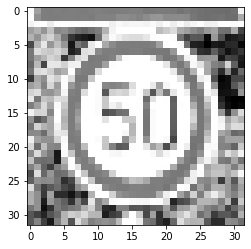

2


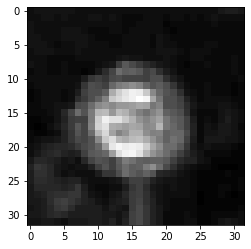

8


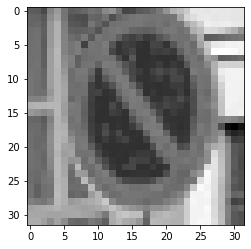

45


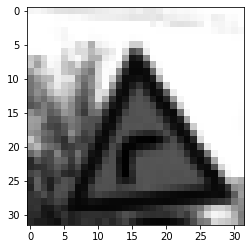

20


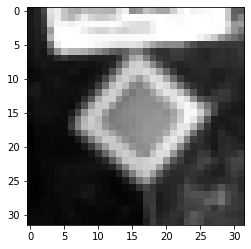

12


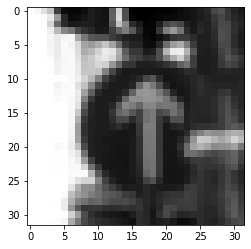

35


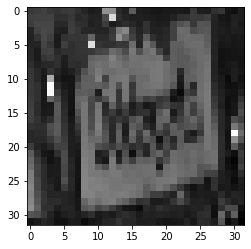

46


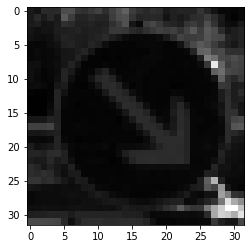

38


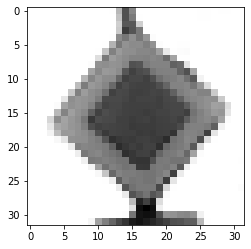

12


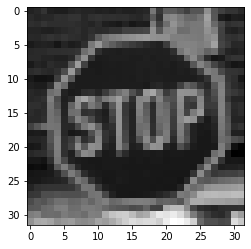

14


In [9]:
#sýnum 10 myndir til að sjá útkomu
for i in range(10):
    mynd = X_train[i, :, :,0]
    plt.imshow(mynd,cmap="gray")
    plt.show()
    print(y_train[i])


In [10]:
import pickle
#Setjum gögn á pickle format
pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()